<a href="https://colab.research.google.com/github/williamfazle/Machine-Learning/blob/main/Linear_Regression_for_Salary_vs_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
print("Fazle Rabby")

Fazle Rabby


In [16]:
# ===========================================
# 1. Import Necessary Libraries
# ===========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [17]:
# ===========================================
# 2. Load Dataset
# ===========================================
df = pd.read_csv("/content/salary_vs_experience.csv")

print("First 5 rows:")
print(df.head())

First 5 rows:
   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [18]:
# ===========================================
# 3. Basic Preprocessing
# ===========================================

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Remove duplicates (if any)
df = df.drop_duplicates()

# Rename columns (if needed)
df.columns = ["YearsExperience", "Salary"]

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Missing Values:
YearsExperience    0
Salary             0
dtype: int64

Summary Statistics:
       YearsExperience         Salary
count        25.000000      25.000000
mean          5.108000   71632.360000
std           2.713073   25430.517087
min           1.100000   37731.000000
25%           3.000000   55794.000000
50%           4.900000   61111.000000
75%           7.100000   93940.000000
max          10.000000  116969.000000


In [19]:
# ===========================================
# 4. Feature & Target Separation
# ===========================================
X = df[["YearsExperience"]]
y = df["Salary"]


In [20]:
# ===========================================
# 5. Train-Test Split
# ===========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
# ===========================================
# 6. Feature Scaling (Optional but good practice)
# ===========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
# ===========================================
# 7. Train the Linear Regression Model
# ===========================================
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
# ===========================================
# 8. Make Predictions
# ===========================================
y_pred = model.predict(X_test_scaled)

In [24]:
# ===========================================
# 9. Model Evaluation
# ===========================================
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Performance:")
print("R² Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)


Model Performance:
R² Score: 0.9339917609887792
MSE: 34997410.44260287
RMSE: 5915.860921506089


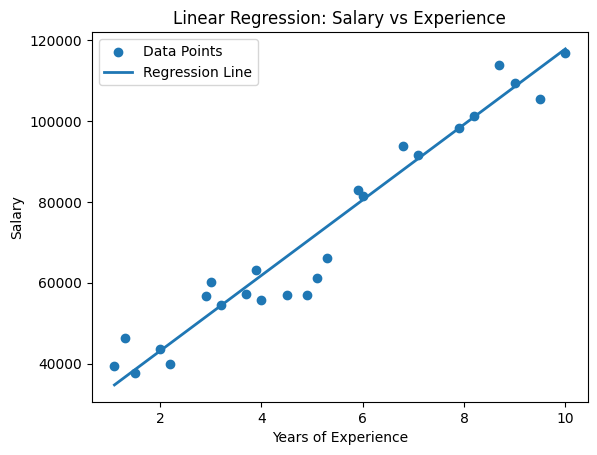

In [25]:
# ===========================================
# 10. Visualization
# ===========================================
plt.scatter(df["YearsExperience"], df["Salary"], label="Data Points")
plt.plot(df["YearsExperience"], model.predict(scaler.transform(df[["YearsExperience"]])),
         linewidth=2, label="Regression Line")

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Experience")
plt.legend()
plt.show()

In [26]:
# ===========================================
# 11. Predict New Values
# ===========================================
new_exp = np.array([[5]])   # Example: 5 years experience
new_exp_scaled = scaler.transform(new_exp)
predicted_salary = model.predict(new_exp_scaled)

print("\nPredicted Salary for 5 years experience:", predicted_salary[0])


Predicted Salary for 5 years experience: 71163.12680853836


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
